# Linear Regression on Algerian Forest Fire Dataset

Submitted by : Nilutpal Das

# Life Cycle of Machine Learning Project
- Understanding the problem
- Data Collection
- Data Cleaning
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Model Evaluation

# 1) Problem Statement
- Implement Linear Regression on Algerian Forest Fire Dataset.

# 2) Data Collection
- The dataset is downloaded from UCI website.
- The dataset includes 244 instances that regroup a data of two regions of Algeria,
- The Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
- 122 instances for each region.
- The period from June 2012 to September 2012.
- The dataset includes 11 attribues and 1 output attribue (class).
- The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

- This dataset comprises weather data attributes.
- Can be used to predict the forest fire weather type.
- Prediction can help to monitor on fire and make proper prevention.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_csv('D:\Data Science\Algerian dataset\Algerian_forest_fires_dataset.csv',header=1)

### Showing top 5 records

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# 3) Data Cleaning

### 3.1) Removing the unwanted rows from the dataset

In [4]:
df.drop(index=[122,123], inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

### 3.2) Adding new column name 'Region' in dataset

In [5]:
for i in range(len(df)):
    if i<=121:
        df['Region'] = 'Bejaia'
    else:
        df['Region'][i] = 'Sidi Bel-abbes'

In [6]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi Bel-abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi Bel-abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel-abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel-abbes


### 3.3) Renaming the names of the columns

In [7]:
df.rename(columns={' RH': 'RH', ' Ws': 'Ws', 'Rain ': 'Rain', 'Classes  ':'Classes'},inplace=True)

### 3.4) Stripping the classes features

In [8]:
df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


# 4) Exploratory Data Analysis

## 4.1) Data Profiling

### 4.1.1) Shape of the dataset

In [10]:
df.shape

(244, 15)

### Observation

- This dataset comprises of 244 Rows and 15 Columns.

### 4.1.2) Columns of the dataset

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### 4.1.3) Checking missing values

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

### Observation

- One NuLL value in 'Classes' feature.

### 4.1.4) Fixing particular row from the dataset which is having the NuLL value

In [13]:
df.iloc[165]

day                        14
month                      07
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                     14.6 9
ISI                      12.5
BUI                      10.4
FWI                   fire   
Classes                   NaN
Region         Sidi Bel-abbes
Name: 165, dtype: object

### Observation

- Some miss match positions.

### 4.1.5) Resetting missmatched position

In [14]:
df.at[165, 'DC'] = 14.6
df.at[165, 'ISI'] = 9
df.at[165, 'BUI'] = 12.5
df.at[165, 'FWI'] = 10.4
df.at[165, 'Classes'] = 'fire'

### 4.1.6) Again checking the info of that particular Row

In [15]:
df.iloc[165]

day                        14
month                      07
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                       14.6
ISI                         9
BUI                      12.5
FWI                      10.4
Classes                  fire
Region         Sidi Bel-abbes
Name: 165, dtype: object

### 4.1.7) Checking again missing values

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

### Observation

- We have zero NuLL values.

### 4.1.8) Changing the datatypes of all columns

In [17]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['FWI']=df['FWI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)
df['Region']=df['Region'].astype(object)

### 4.1.9) Adding new feature name 'Date' by replacing unecessary feature like 'day', 'month', 'year'

In [18]:
df['Date'] = pd.to_datetime(df[['day', 'month', 'year']])
df.drop(['day', 'month', 'year'],axis=1,inplace = True)

In [19]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,2012-06-05


### 4.1.10) Checking unique values

In [20]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

### 4.1.11) Check datatypes of the dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    object        
 11  Region       244 non-null    object        
 12  Date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int32(2), object(2)
memory usage: 23.0+ KB


### Observation

- 244 Rows and 15 Columns.
- No NuLL values.
- 4 datatypes int32, float64, object and datetime64.
- Datatypes included float64 = 8 Columns, int32 = 2 Columns, object = 2 Columns, datetime64 = 1 Columns.
- Total memory usage is 23.0+ KB

### 4.1.12) Checking memory usage by the dataset

In [22]:
df.memory_usage()

Index           128
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
Region         1952
Date           1952
dtype: int64

### Observation

- Temperature and RH uses 976 Kb memory.
- Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region and date uses 1952 Kb memory.
- Datatype is int64.

### 4.1.13) Numerical and Categorical features

### (a) Numerical Data

In [23]:
# define numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# print numerical features
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))

We have 11 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Date']


### (b) Categorical Data

In [24]:
# define categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print categorical features
print('\n We have {} categorical features : {}'.format(len(categorical_features), categorical_features))


 We have 2 categorical features : ['Classes', 'Region']


## 4.2) Feature Information

### (a) Weather data Components

- Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative humidity in %: 21 to 90
- Ws : Wind speed in km/h: 6 to 29
- Rain : total day in mm: 0 to 16.8

### (b) Date Components

- day, month and year is merged into date.
- date displayed in (DD/MM/YYYY) format.

### (c) FWI Components

- FFMC : Fine Fuel Moisture Code index the FWI system: 28.6 to 92.5
- DMC : Duff Moisture Code index from FWI system: 1.1 to 65.9
- ISI : Initial Spread Index from FWI system: 0 to 18.5
- BUI : Buildup Index from FWI index: 1.1 to 68
- DC : Drought Code index from FWI system: 7 to 220.4
- FWI : Fire Weather Index: 0 to 31.1
- Classes : Fire and not Fire
- Region : 1 for Bejaia region and 0 for Sidi Bel-abbes region

## 4.3) Univariate Analysis

- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” 
- The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [25]:
df.var()

Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.632245
ISI              17.260932
BUI             201.686818
FWI              55.180617
dtype: float64

### 4.3.1) Numerical Features Analysis

###  kde plot

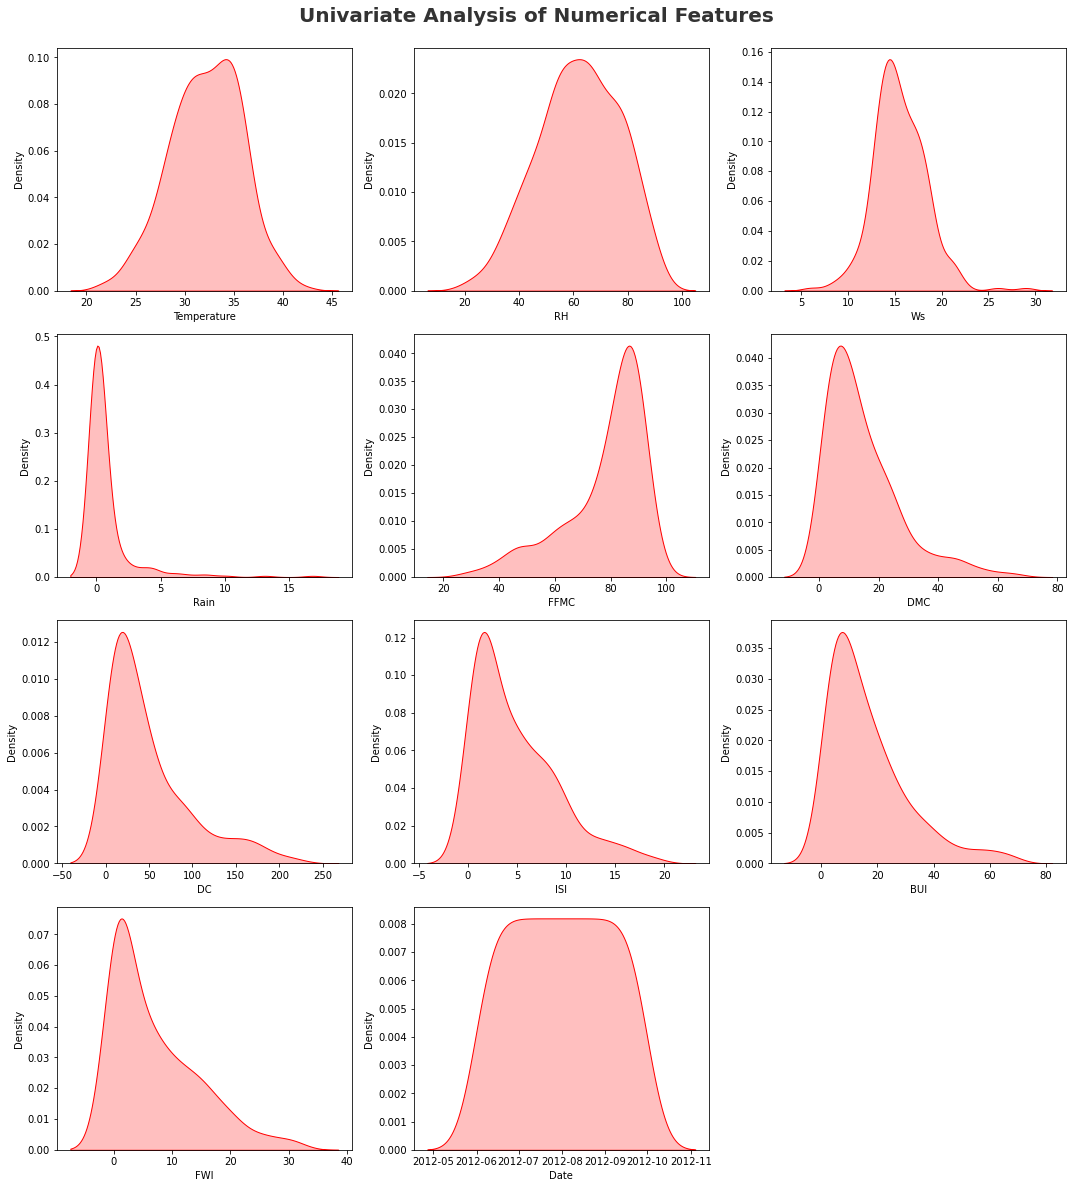

In [26]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r',warn_singular=False)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Scatter plot

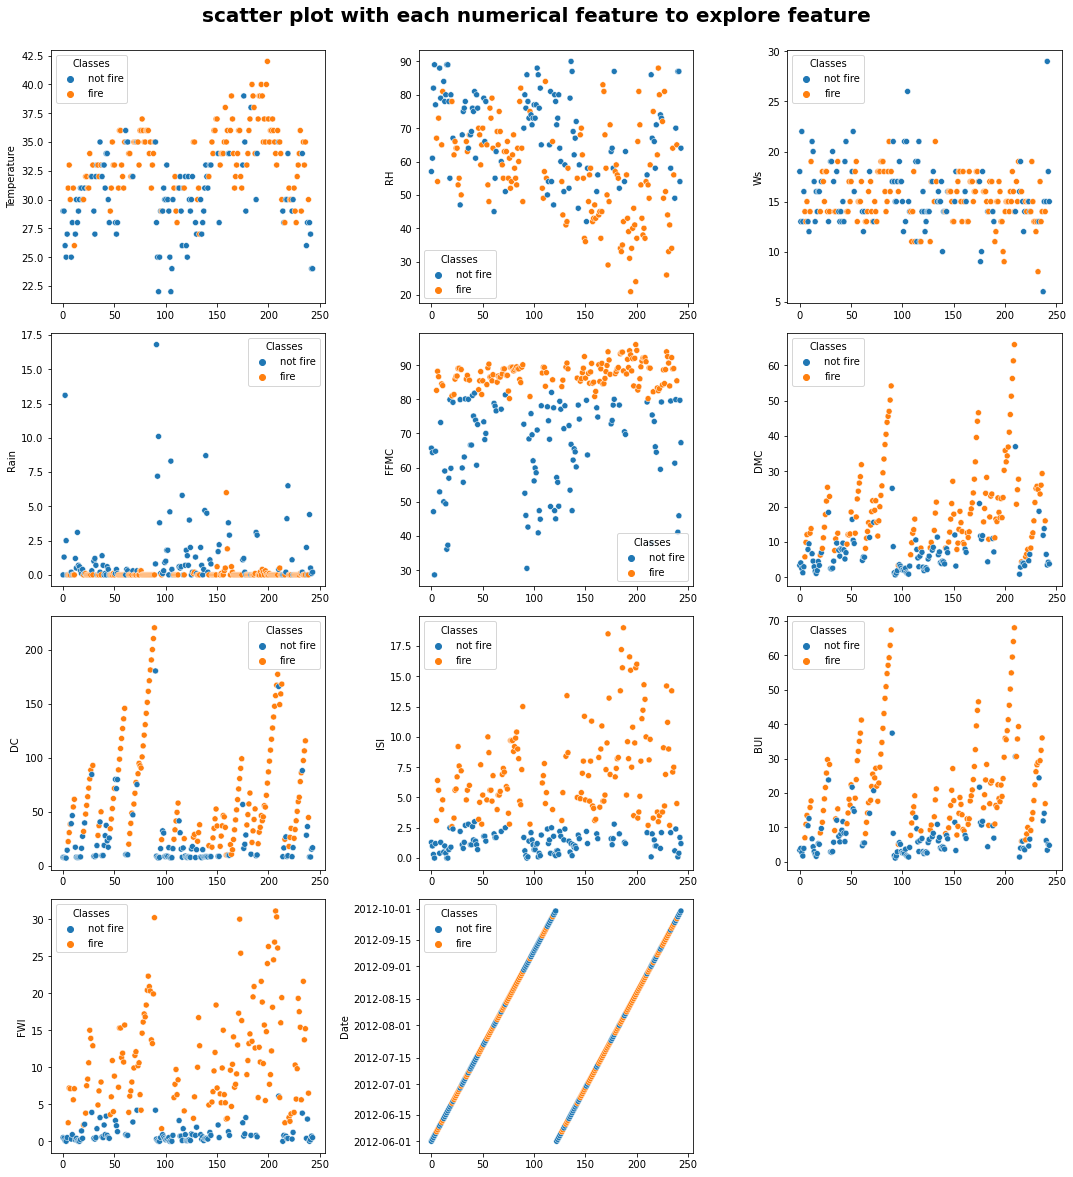

In [27]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numerical_features[i], x=df.index, data=df,hue='Classes')
    plt.tight_layout()

### Observation

- Rain,ISI,BUI,DMC are right skewed and postively skewed.
- FFMC is a Left skewed and Negetively skewed.
- Outliers in Rain, ISI, BUI, DMC and FFMC.

### 4.3.2) Categorical Features

### Count plot

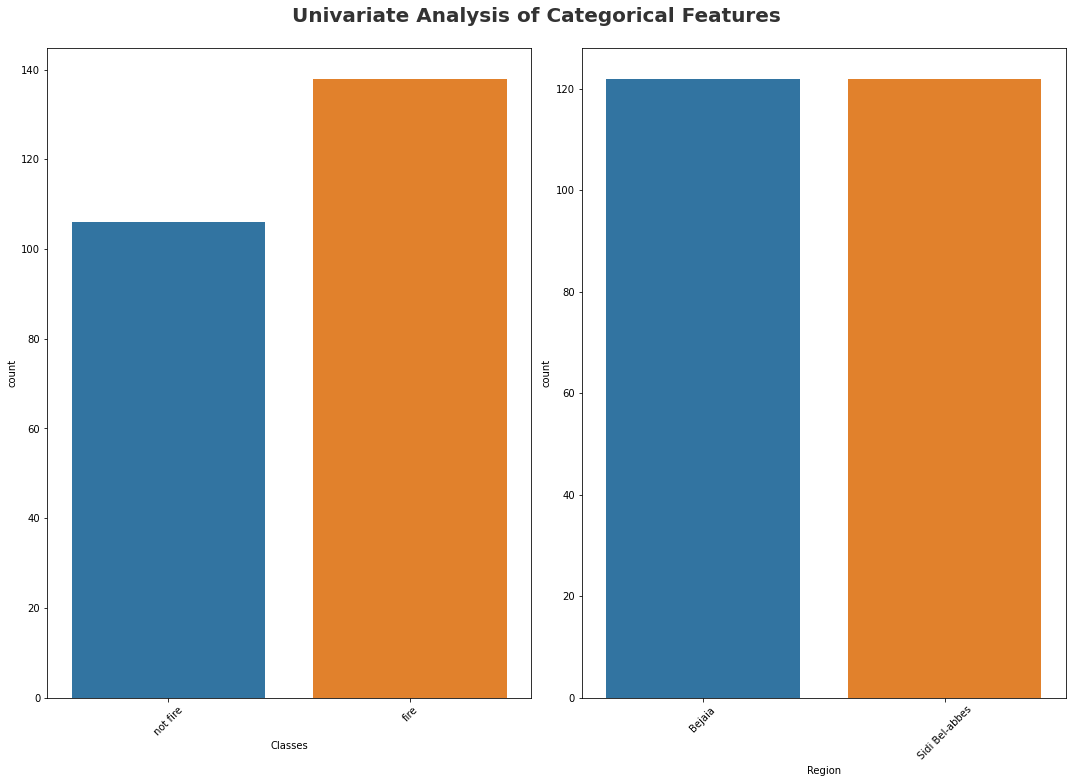

In [28]:
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
cat1 = ['Classes', 'Region']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Observation

- Region Sidi Bel Abbes experiences more fire cases than Bejaia.
- Region Bejaia experiences less non fire cases than Sidi Bel Abbes.

## Statistical Analysis

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.759836,4.154628,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.673361,14.201648,1.1,6.000,12.45,22.525,68.0
FWI,244.0,7.049180,7.428366,0.0,0.700,4.45,11.375,31.1


<b>Since DMC and BUI are highly coorelated, so dropping anyone won't harm the dataset.</b>

In [34]:
df_new=df.drop(columns=('DMC'),axis=1)

In [35]:
df_new

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,7.6,1.3,3.4,0.5,not fire,Bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,7.6,1.0,3.9,0.4,not fire,Bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,7.1,0.3,2.7,0.1,not fire,Bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,6.9,0.0,1.7,0.0,not fire,Bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,14.2,1.2,3.9,0.5,not fire,Bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,44.5,4.5,16.9,6.5,fire,Sidi Bel-abbes,2012-09-26
240,28,87,15.0,4.4,41.1,8.0,0.1,6.2,0.0,not fire,Sidi Bel-abbes,2012-09-27
241,27,87,29.0,0.5,45.9,7.9,0.4,3.4,0.2,not fire,Sidi Bel-abbes,2012-09-28
242,24,54,18.0,0.1,79.7,15.2,1.7,5.1,0.7,not fire,Sidi Bel-abbes,2012-09-29


### Target feature is Temperature

### So, analyzing each feature with respect to Temperature

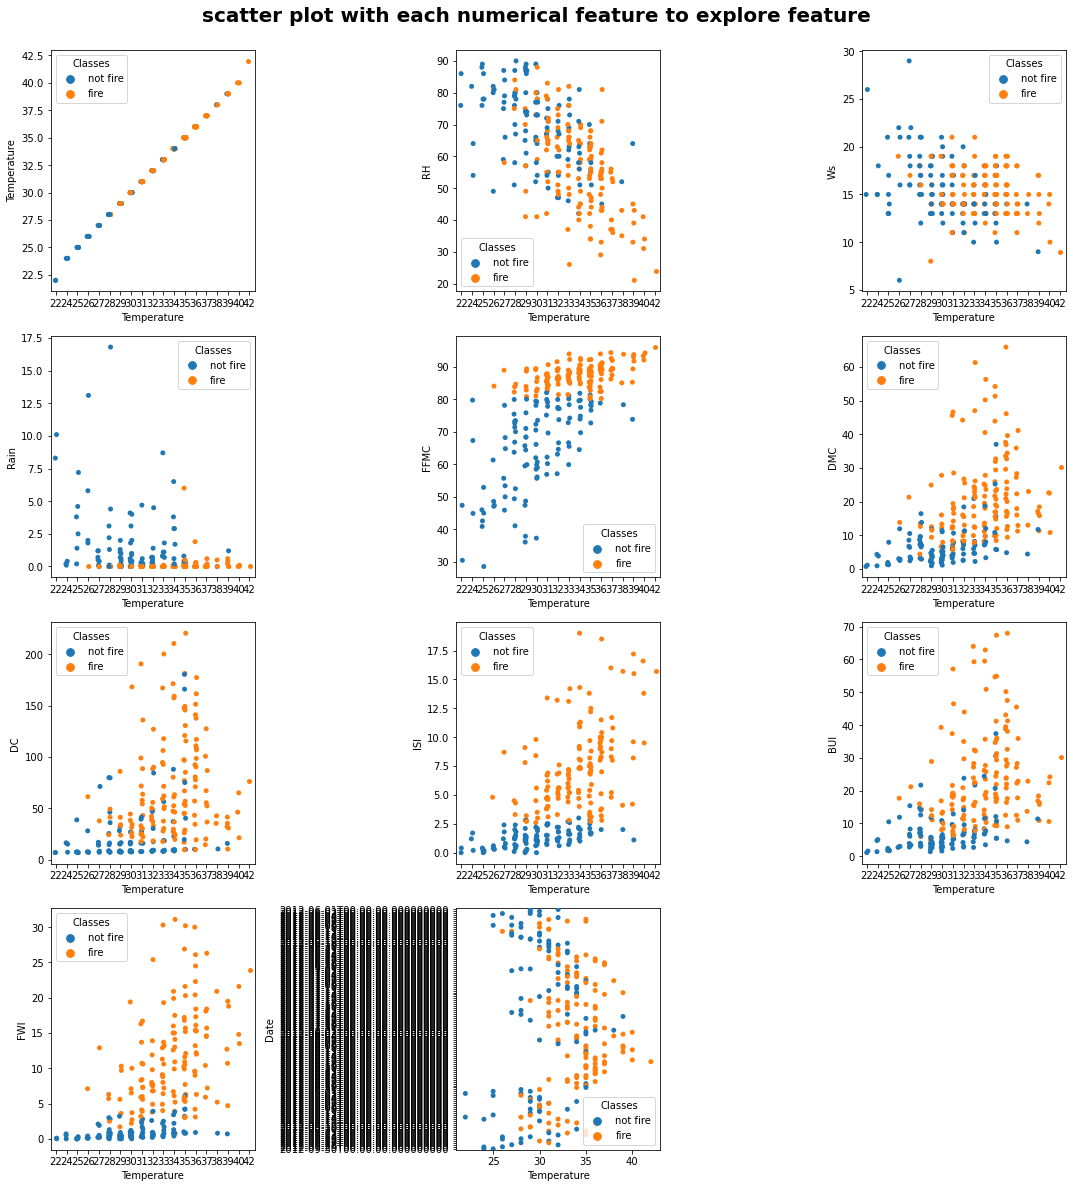

In [36]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numerical_features[i], x='Temperature', data=df,hue='Classes')
    plt.tight_layout()

### Box plot 
<b>For finding outliers</b>

<AxesSubplot:>

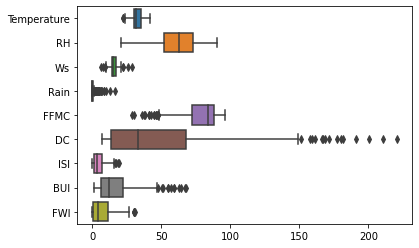

In [37]:
sns.boxplot(data=df_new,orient='h')

### Observation

- All features except RH have outliers.

### Graphical Analysis

### Temperature w.r.t Region

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

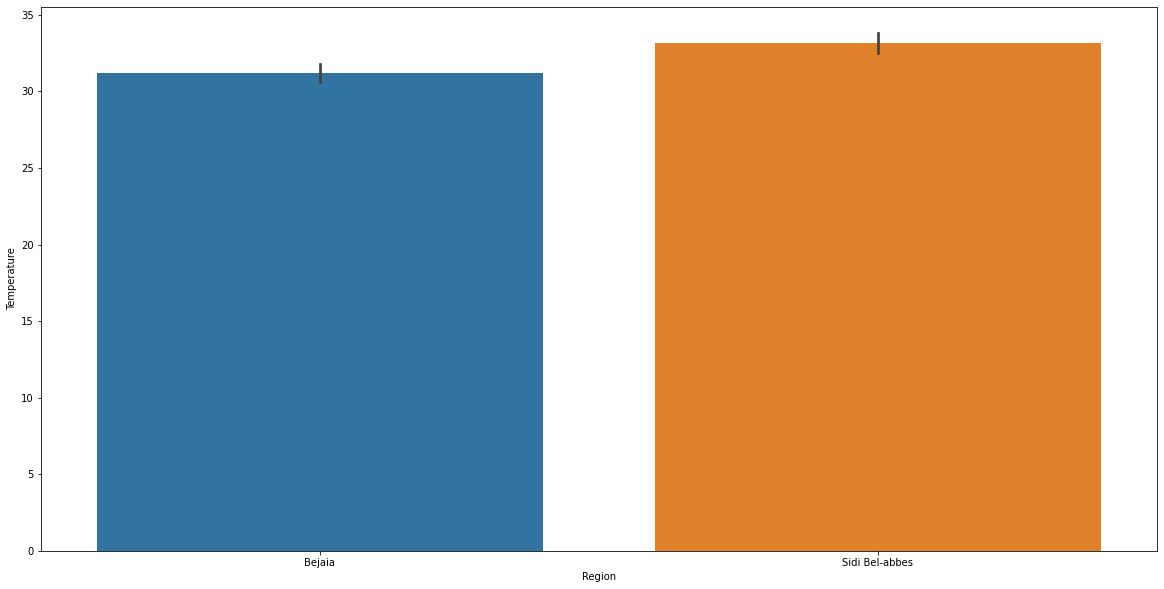

In [38]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x='Region', y='Temperature', data=df)

### Observation

- Sidi bel Abbas region experiences most of the time High Temperature.

### Temperature w.r.t Temperature range

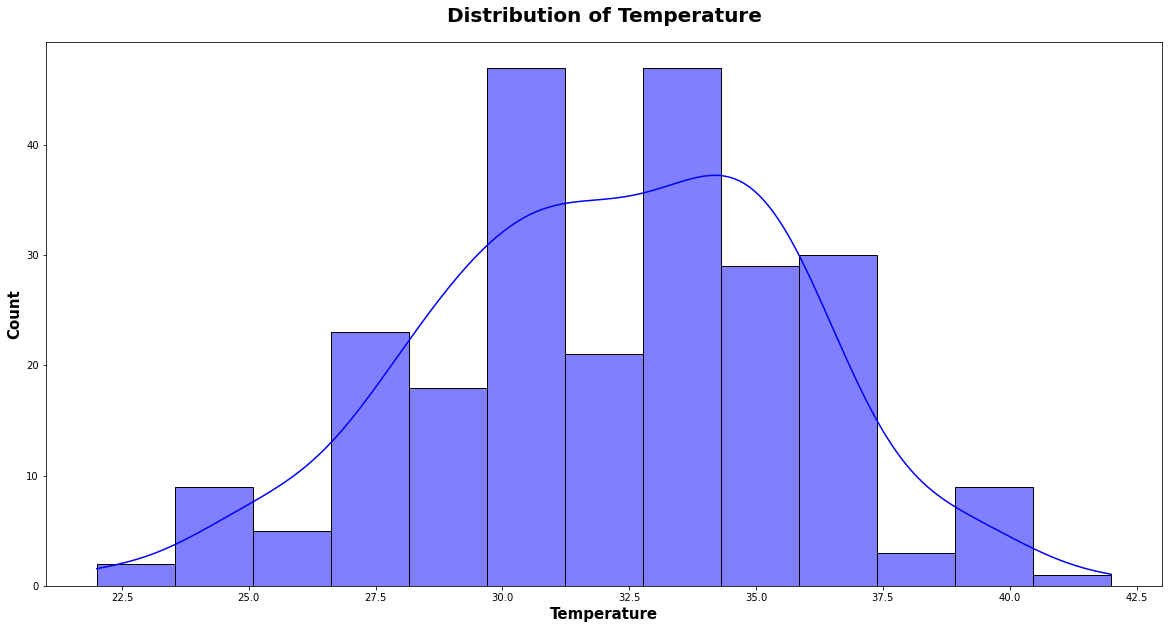

In [39]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='b',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

### Observation

- Temperature range is 30 - 35 degree celcius.

### Temperature w.r.t Rain

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

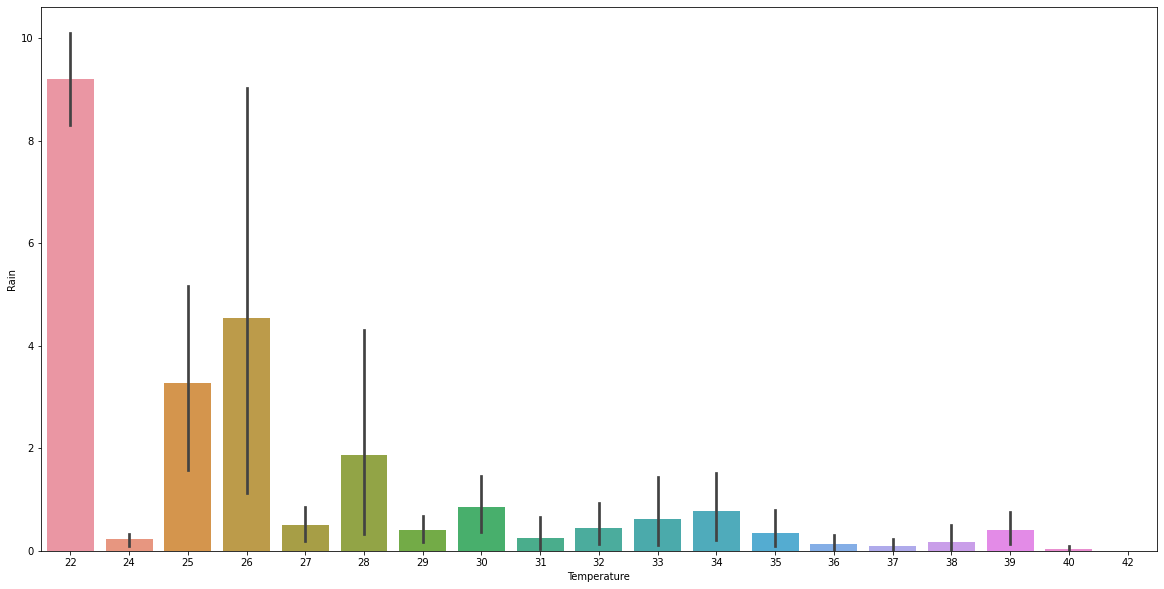

In [44]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Rain",data=df)

### Observation

- When Rain is high, Temperature is low and vice-versa.

## 4.4) Multivariate Analysis

### Multicollinearity in Numerical features

In [51]:
df.cov()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.111931,9.148506,23.553987,15.300965
RH,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.165754,-42.561327,-73.916459,-64.178446
Ws,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.203135,0.142964,1.209369,0.708851
Rain,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.258988,-2.889611,-8.501670,-4.823366
FFMC,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.044709,44.124525,120.185186,73.640607
DMC,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.552604,34.856991,172.521016,80.407612
DC,64.111931,-156.165754,10.203135,-28.258988,344.044709,515.552604,2267.632245,99.696270,636.831657,260.718118
ISI,9.148506,-42.561327,0.142964,-2.889611,44.124525,34.856991,99.696270,17.260932,37.841354,28.467868
BUI,23.553987,-73.916459,1.209369,-8.501670,120.185186,172.521016,636.831657,37.841354,201.686818,90.399916
FWI,15.300965,-64.178446,0.708851,-4.823366,73.640607,80.407612,260.718118,28.467868,90.399916,55.180617


In [50]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


### Pair plot

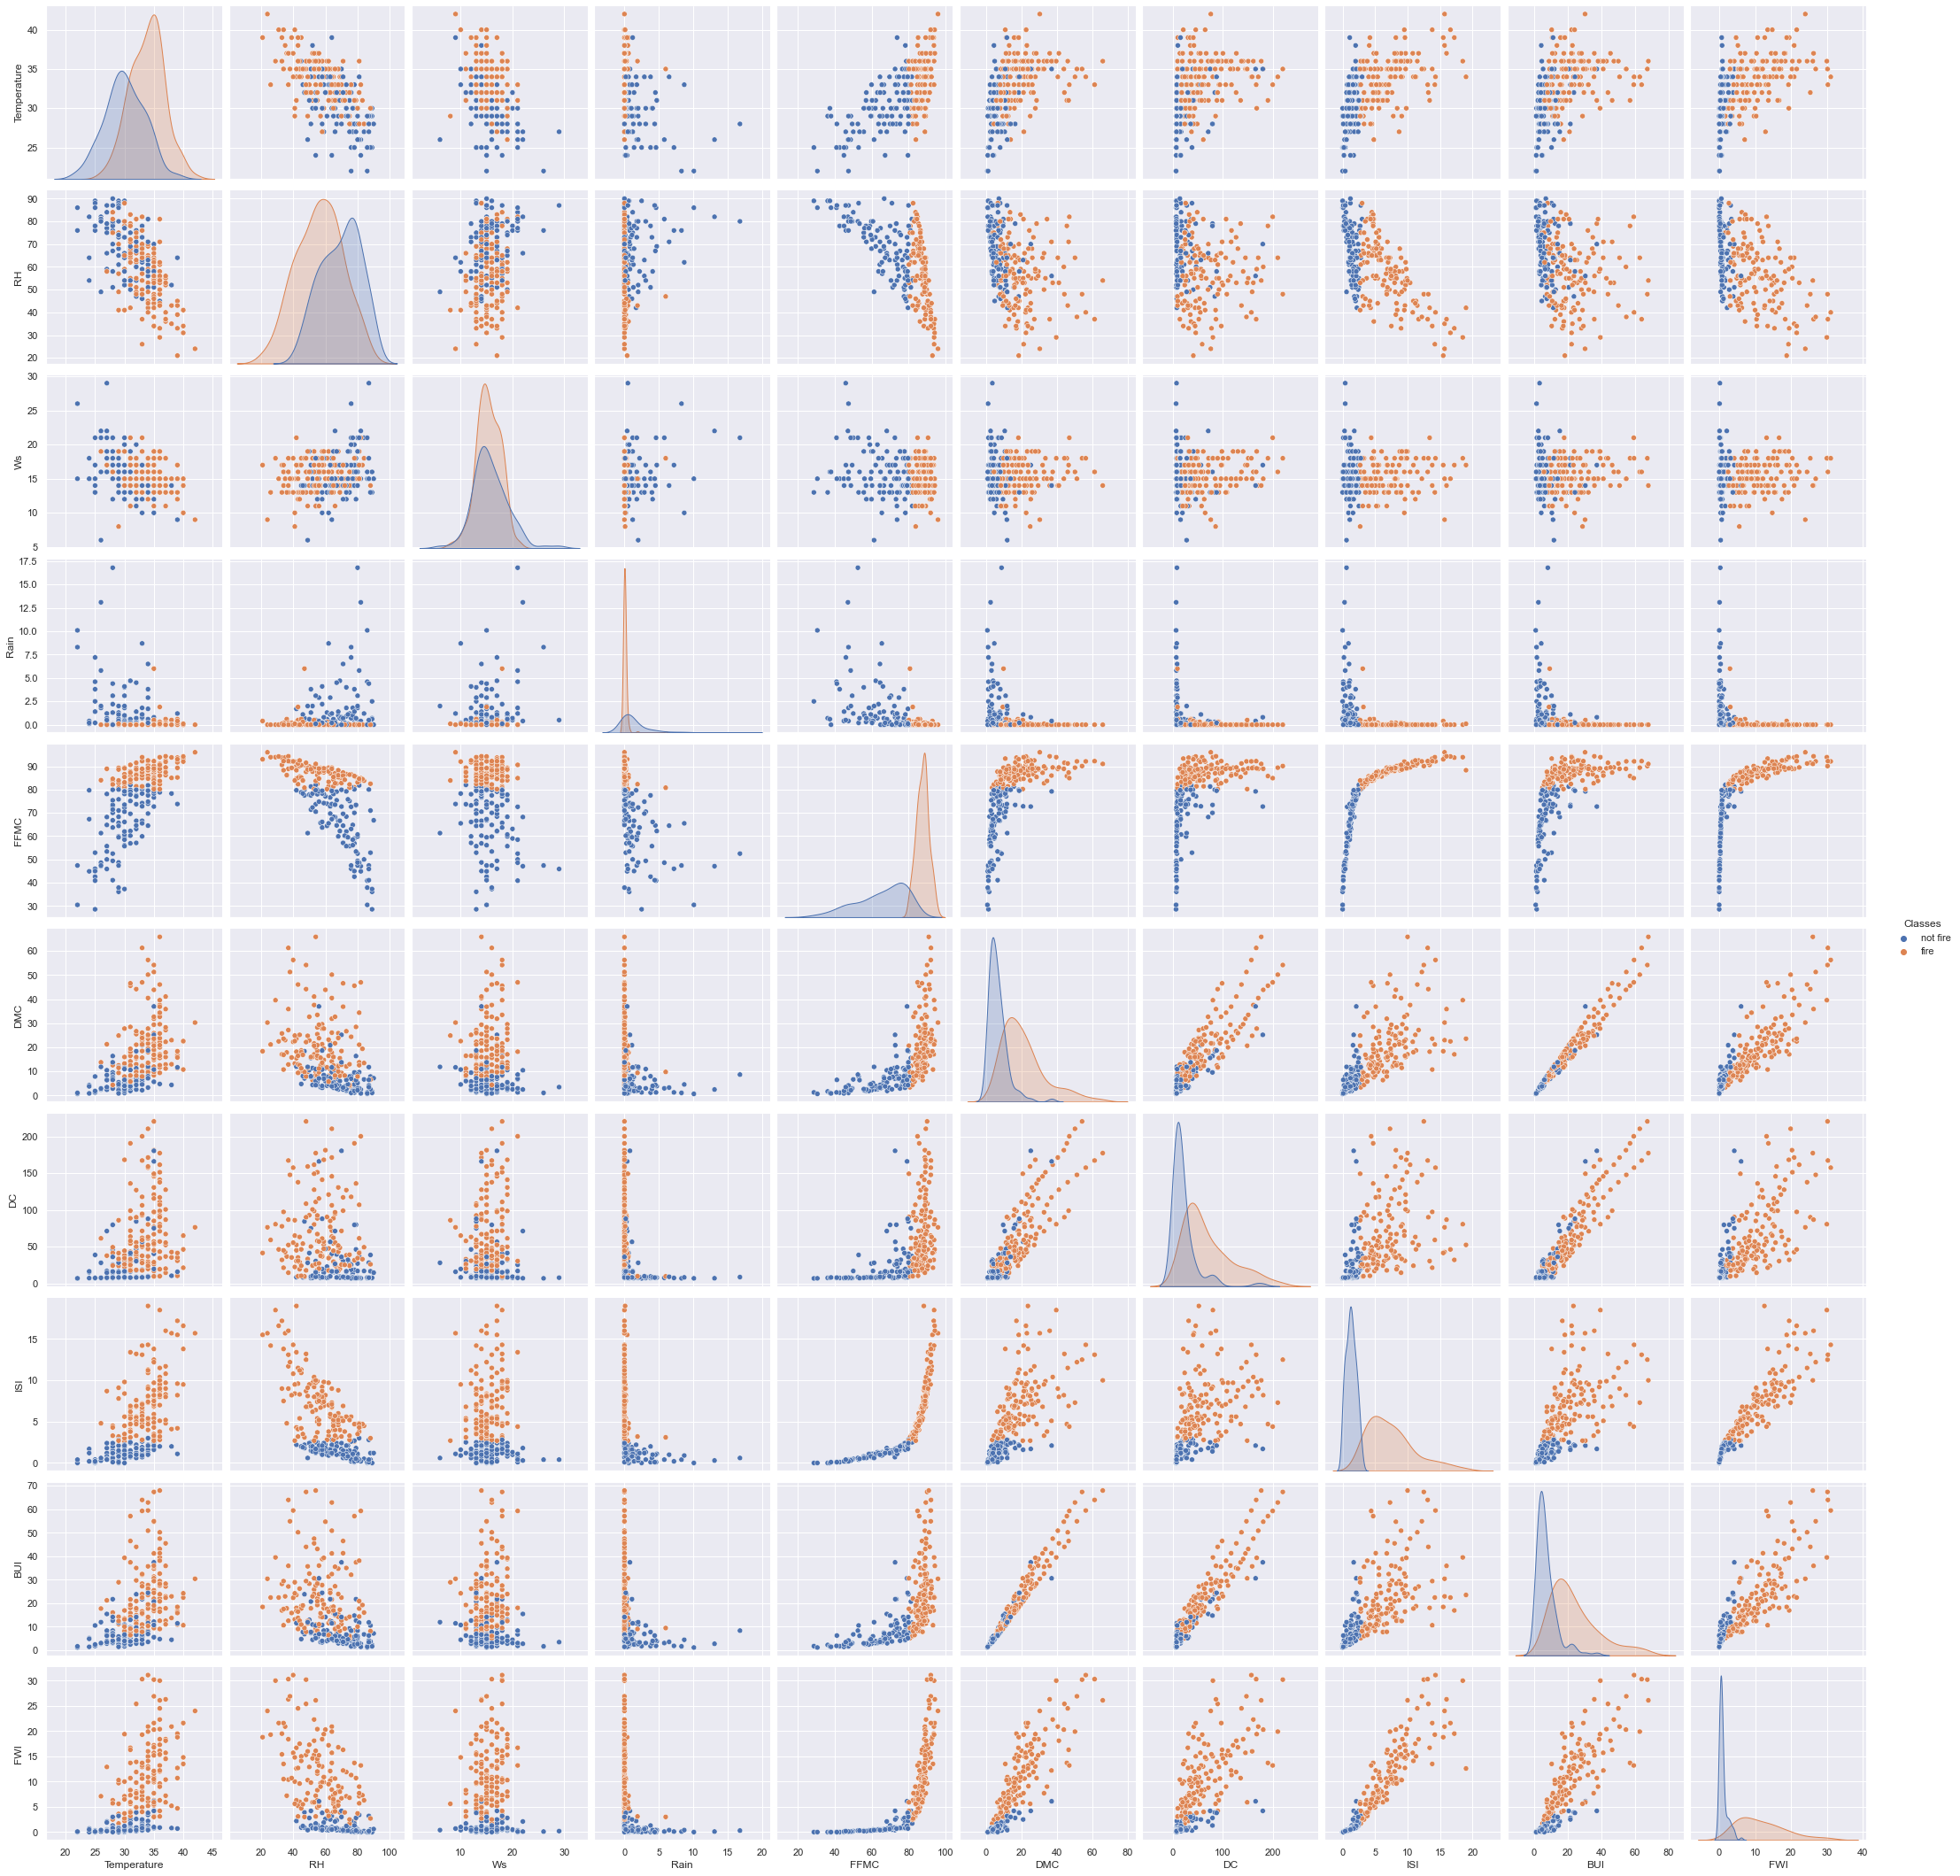

In [48]:
sns.pairplot(df,hue='Classes',size=3)

### Heat map

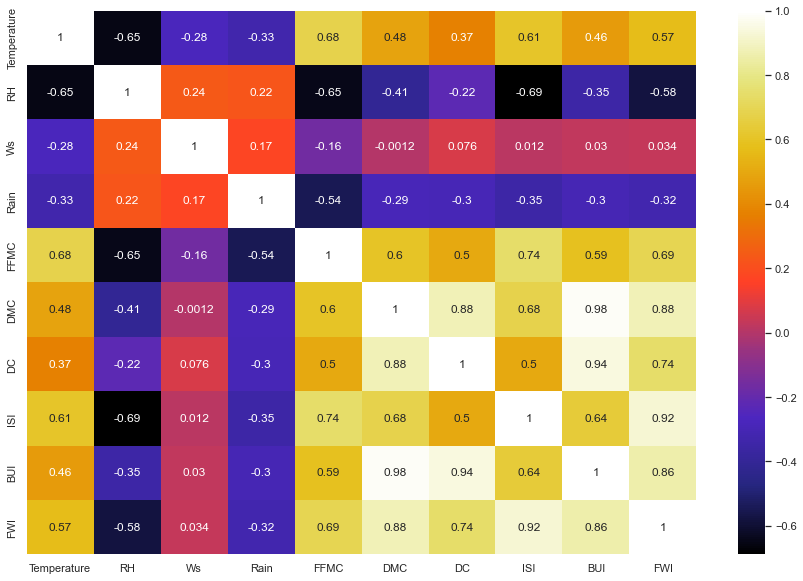

In [49]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### observation

- Highly +ve correlated features are DMC and BUI - 'White color'
- Highly -ve correlated features are RH and Temp, RH and FFMC, RH and ISI - 'Black color'

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

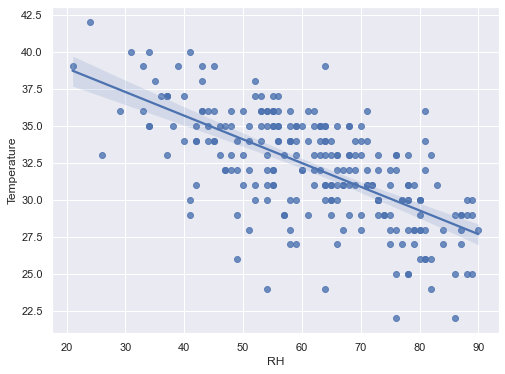

In [45]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x = "RH", y = "Temperature", data = df)

### Independent and Dependent Features

In [41]:
x=df_new.iloc[:,1:-3]
y=df_new.iloc[:,0]

In [42]:
x

,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI
0,57,18.0,0.0,65.7,7.6,1.3,3.4,0.5
1,61,13.0,1.3,64.4,7.6,1.0,3.9,0.4
2,82,22.0,13.1,47.1,7.1,0.3,2.7,0.1
3,89,13.0,2.5,28.6,6.9,0.0,1.7,0.0
4,77,16.0,0.0,64.8,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...
239,65,14.0,0.0,85.4,44.5,4.5,16.9,6.5
240,87,15.0,4.4,41.1,8.0,0.1,6.2,0.0
241,87,29.0,0.5,45.9,7.9,0.4,3.4,0.2
242,54,18.0,0.1,79.7,15.2,1.7,5.1,0.7


In [43]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

### Splitting training and testing data

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

### independent training data

In [53]:
x_train

,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI
237,49,6.0,2.0,61.3,28.1,0.6,11.9,0.4
78,54,18.0,0.0,89.4,110.9,9.7,27.5,16.1
25,64,18.0,0.0,86.8,71.8,6.7,21.6,10.6
124,80,14.0,2.0,48.7,7.6,0.3,2.6,0.1
176,64,9.0,1.2,73.8,15.9,1.1,11.4,0.7
...,...,...,...,...,...,...,...,...
64,69,13.0,0.0,85.0,19.8,4.0,8.2,3.9
15,89,13.0,0.7,36.1,7.6,0.0,2.2,0.0
228,51,13.0,0.0,88.7,50.2,6.9,17.8,9.8
125,64,14.0,0.0,79.4,15.4,2.2,5.6,1.0


### independent testing data

In [54]:
x_test

,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI
162,56,15.0,2.9,74.8,9.5,1.6,6.8,0.8
60,64,17.0,0.0,87.2,145.7,6.8,41.2,15.7
61,45,14.0,0.0,78.8,10.2,2.0,4.7,0.9
63,63,14.0,0.3,76.6,10.0,1.7,5.5,0.8
69,59,17.0,0.0,87.4,57.0,6.9,17.9,9.9
...,...,...,...,...,...,...,...,...
169,68,15.0,0.0,86.1,51.6,5.2,23.9,9.1
232,41,8.0,0.1,83.9,86.0,2.7,28.9,5.6
144,59,16.0,0.8,74.2,8.3,1.6,6.7,0.8
208,37,16.0,0.0,92.2,167.2,13.1,64.0,30.3


### dependent training data

In [55]:
y_train

237    26
78     36
25     31
124    29
176    39
       ..
64     34
15     29
228    32
125    30
9      28
Name: Temperature, Length: 163, dtype: int32

### dependent testing data

In [57]:
y_test

162    34
60     35
61     36
63     35
69     35
       ..
169    33
232    29
144    33
208    33
105    22
Name: Temperature, Length: 81, dtype: int32

In [58]:
x_train.shape

(163, 8)

In [59]:
x_test.shape

(81, 8)

In [60]:
y_train.shape

(163,)

In [61]:
y_test.shape

(81,)

### Standardization and Feature Scaling the dataset

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [63]:
scaler

StandardScaler()

In [65]:
x_train=scaler.fit_transform(x_train)

In [66]:
x_test=scaler.transform(x_test)

In [67]:
x_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.97156746,
        -0.32636097, -0.86597829],
       [-0.52508491,  0.99944243, -0.441414  , ...,  1.19293541,
         0.76499972,  1.21371864],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.47936304,
         0.35224151,  0.48516239],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.52693453,
         0.08639724,  0.37919057],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.59099552,
        -0.76710278, -0.78649943],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.80506723,
        -0.27738965, -0.7997459 ]])

In [68]:
x_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -8.21325921e-01, -7.33709998e-01,
        -6.83151962e-01, -8.12992382e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  2.03374779e+00,  5.03148781e-01,
         1.72343828e+00,  1.16073273e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -8.06652268e-01, -6.38567015e-01,
        -8.30065901e-01, -7.99745905e-01],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -8.10844740e-01, -7.09924252e-01,
        -7.74098686e-01, -8.12992382e-01],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.74386276e-01,  5.26934527e-01,
         9.33931438e-02,  3.92437047e-01],
       [-5.91330147e-01,  2.72169591e-01, -4.41414004e-01,
         8.21667676e-01,  2.36495311e+00,  1.35943563e+00,
         2.16418009e+00,  2.03500022e+00],
       [-5.91330147e-01,  1.363078

### Linear Regression

### Model Training

In [69]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [70]:
regression

LinearRegression()

In [71]:
regression.fit(x_train, y_train)

LinearRegression()

### Coefficients and Intercept

In [72]:
print(regression.coef_)

[-1.26727905 -0.54101797 -0.21943186  1.05414753  0.53223083  0.02362972
 -0.25283375  0.23646389]


In [73]:
print(regression.intercept_)

32.17791411042945


In [74]:
reg_pred=regression.predict(x_test)

In [75]:
reg_pred

array([31.73234662, 33.39030119, 33.61405111, 31.87954716, 33.06586657,
       34.96791538, 33.85027588, 33.63331414, 32.04804585, 33.05943254,
       33.62988831, 27.82290771, 35.29347506, 29.44088401, 31.91096644,
       31.87132156, 33.9602693 , 28.18105257, 36.08101602, 34.34075554,
       32.79958404, 33.97078827, 33.7809388 , 32.80308456, 35.80069454,
       28.76933598, 32.31539014, 33.19651414, 27.726304  , 32.1854697 ,
       26.1619812 , 26.83083981, 34.07093816, 32.02044265, 33.00423786,
       30.61595053, 29.01549448, 32.44992806, 27.79955503, 35.53550024,
       32.73243283, 34.01374459, 33.88861804, 31.13859887, 36.41778054,
       34.19675343, 24.84645618, 34.98096926, 33.78536207, 29.7113244 ,
       31.21947136, 32.53177937, 35.69163645, 32.19023599, 30.33258848,
       30.33765202, 32.56225677, 36.14611876, 31.18504901, 33.45719224,
       32.38282845, 32.76026682, 31.20488789, 24.7061469 , 31.70034426,
       36.06315152, 29.54046257, 29.98448783, 34.87238095, 33.47

### Assumption of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

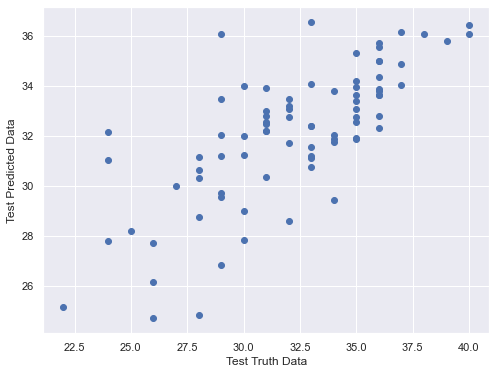

In [77]:
# Relationship between real data and predicted data
plt.scatter(y_test,reg_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [78]:
# Calculating residual
residuals=y_test - reg_pred

In [79]:
residuals

162    2.267653
60     1.609699
61     2.385949
63     3.120453
69     1.934133
         ...   
169    0.590819
232   -7.051674
144    1.464636
208   -3.543045
105   -3.163825
Name: Temperature, Length: 81, dtype: float64

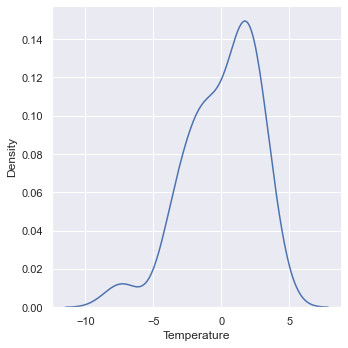

In [80]:
# Distribution of residual are approximately Normal Distribution
sns.displot(residuals,kind="kde")

### Observation

- Distribution is left skewed.

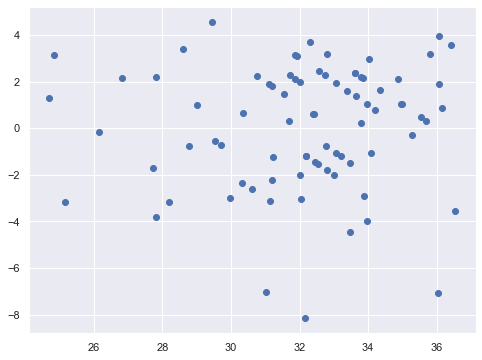

In [81]:
# Scatterplot with prediction and residual
# Uniform Distribution
plt.scatter(reg_pred,residuals)

### Performance Metrics

In [82]:
# Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.945272606141771
2.177260793883495
2.635388511423272


### R Squared and Adjusted R Squared

In [83]:
# R Squared
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5407291663922256


In [85]:
# Adjusted R Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.48969907376913957

### Ridge regression

In [86]:
## Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()

In [87]:
ridge.fit(x_train,y_train)

Ridge()

In [88]:
print(ridge.coef_)

[-1.25556305 -0.54050633 -0.22268482  1.03678561  0.48209609  0.07521787
 -0.16554943  0.16717726]


In [89]:
print(ridge.intercept_)

32.17791411042945


In [90]:
ridge_pred=ridge.predict(x_test)

In [91]:
ridge_pred

array([31.72605725, 33.37613461, 33.59099929, 31.87475756, 33.05298308,
       34.94776191, 33.81236937, 33.58905972, 32.04356065, 33.05011456,
       33.63429804, 27.82848492, 35.2714216 , 29.42705632, 31.89830943,
       31.88066019, 33.94209218, 28.19471634, 36.09412677, 34.35677201,
       32.78813328, 33.91846485, 33.7668546 , 32.81125404, 35.81850096,
       28.79848967, 32.27720636, 33.18688252, 27.74286139, 32.19181954,
       26.17139638, 26.85538177, 34.05623218, 32.01112485, 32.99003146,
       30.6051685 , 29.01741906, 32.43839626, 27.81381278, 35.49852092,
       32.71106191, 34.02287733, 33.90529872, 31.12955785, 36.40084135,
       34.18287694, 24.85860673, 34.97897127, 33.79331599, 29.71173246,
       31.21495697, 32.52728129, 35.69651118, 32.17999865, 30.34364518,
       30.32374592, 32.60145273, 36.15126634, 31.2167123 , 33.45003811,
       32.3710609 , 32.75537003, 31.19849874, 24.70008377, 31.6966219 ,
       36.0677736 , 29.56236916, 29.97858574, 34.88447303, 33.46

### Assumption of Ridge regression

Text(0, 0.5, 'Test Predicted Data')

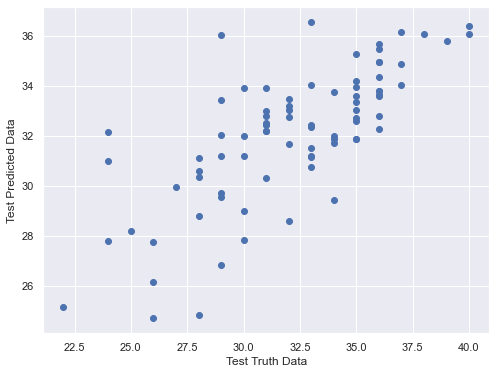

In [92]:
# Relationship between real data and predicted data
plt.scatter(y_test,ridge_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [93]:
# Calculating residual
residuals=y_test - ridge_pred

In [94]:
residuals

162    2.273943
60     1.623865
61     2.409001
63     3.125242
69     1.947017
         ...   
169    0.566752
232   -7.051701
144    1.462507
208   -3.561742
105   -3.158492
Name: Temperature, Length: 81, dtype: float64

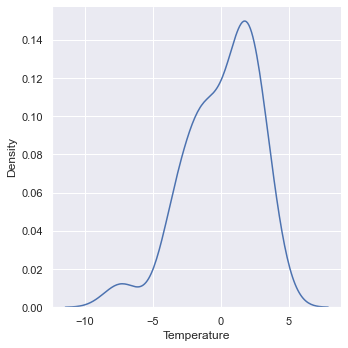

In [95]:
# Distribution of residual are approximately Normal Distribution
sns.displot(residuals,kind="kde")

### Observation

- Distribution is left skewed.

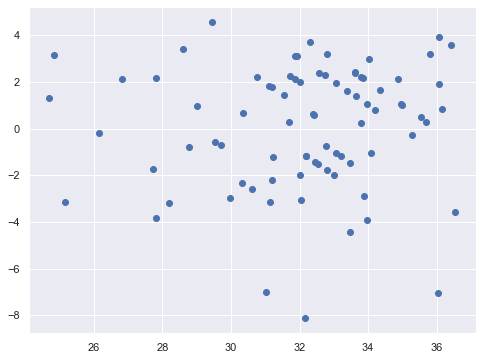

In [96]:
# Scatterplot with prediction and residual
# Uniform Distribution
plt.scatter(reg_pred,residuals)

In [97]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

6.937034660929738
2.177014764095557
2.6338251006719746


In [98]:
# R Squared
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print(score)

0.5412739179346487


In [99]:
# Adjusted R Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.49030435326072075

### Lasso regression

In [100]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [102]:
lasso

Lasso()

In [103]:
lasso.fit(x_train, y_train)

Lasso()

In [104]:
print(lasso.coef_)

[-0.71955751 -0.         -0.          0.89582004  0.          0.
  0.          0.        ]


In [105]:
print(lasso.intercept_)

32.17791411042945


In [106]:
lasso_pred=lasso.predict(x_test)

In [107]:
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

### Assumption of Lasso regression

Text(0, 0.5, 'Test Predicted Data')

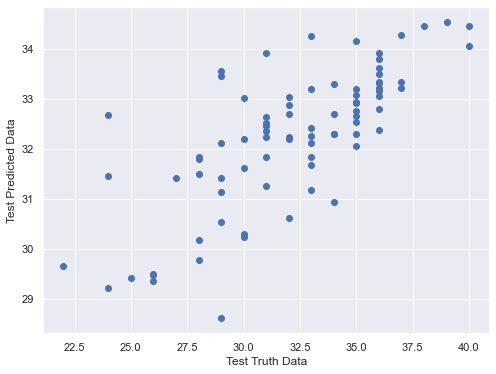

In [108]:
# Relationship between real data and predicted data
plt.scatter(y_test,lasso_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [109]:
# Calculating residual
residuals=y_test - lasso_pred

In [110]:
residuals

162    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
169    0.583574
232   -4.568827
144    0.882714
208   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

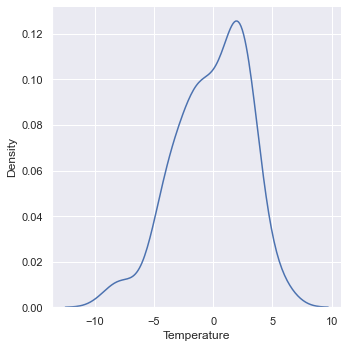

In [111]:
# Distribution of residual are approximately Normal Distribution
sns.displot(residuals,kind="kde")

### Observation

- Distribution is left skewed.

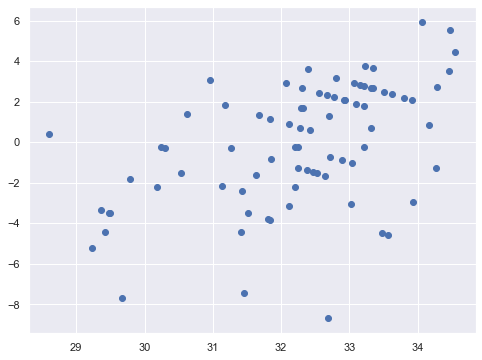

In [112]:
# Scatterplot with prediction and residual
# Uniform Distribution
plt.scatter(lasso_pred,residuals)

In [113]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

9.10609532182792
2.4978660766652734
3.0176307464346794


In [114]:
# R Squared
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
print(score)

0.39784019626969913


In [115]:
# Adjusted R Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.33093355141077685

### Elastic Net regression

In [116]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()

In [117]:
elastic

ElasticNet()

In [118]:
elastic.fit(x_train,y_train)

ElasticNet()

In [119]:
print(elastic.coef_)

[-0.68377791 -0.10873001 -0.02083121  0.70493387  0.          0.22896344
  0.07733533  0.1822098 ]


In [120]:
print(elastic.intercept_)

32.17791411042945


In [121]:
elastic_pred=elastic.predict(x_test)

In [122]:
elastic_pred

array([31.92778274, 32.95250724, 32.71119722, 31.77134083, 32.92801741,
       33.99050179, 33.53902004, 32.58962193, 31.93651966, 32.67134649,
       33.35804182, 29.90659996, 34.18554019, 30.68186444, 32.61165892,
       32.21481692, 32.7945839 , 29.43974043, 35.17418981, 33.89534297,
       32.36213   , 33.43380855, 33.5283983 , 32.8386007 , 35.19633069,
       30.01766464, 32.08455825, 32.54878071, 29.38878202, 32.00984925,
       29.15361138, 28.66254395, 33.22090486, 32.27099015, 32.64751022,
       31.34705984, 30.05651772, 32.28102625, 29.22022742, 34.01465745,
       32.84551243, 33.52330689, 34.21265774, 31.55337147, 34.53418824,
       33.38994892, 29.2787136 , 33.93541974, 33.3964204 , 30.36875762,
       31.40639778, 32.30324864, 34.65294213, 32.00860236, 31.35483638,
       30.93541449, 32.30838596, 34.84461644, 31.58190605, 33.45940298,
       32.0717569 , 32.40440528, 31.24375379, 28.88836001, 31.89035871,
       34.88631868, 30.84584502, 31.00368194, 33.82667918, 32.89

### Assumption of ElasticNet regression

Text(0, 0.5, 'Test Predicted Data')

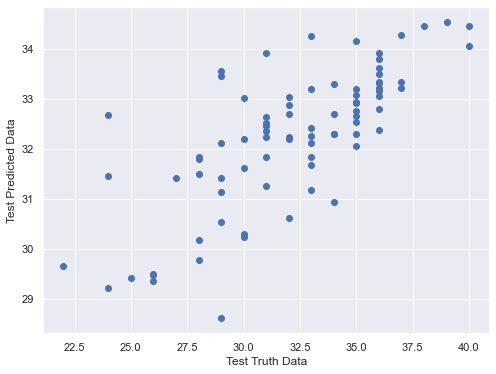

In [123]:
# Relationship between real data and predicted data
plt.scatter(y_test,lasso_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [124]:
# Calculating residual
residuals=y_test - elastic_pred

In [125]:
residuals

162    2.072217
60     2.047493
61     3.288803
63     3.228659
69     2.071983
         ...   
169    0.542605
232   -4.656289
144    1.247988
208   -2.274665
105   -7.082420
Name: Temperature, Length: 81, dtype: float64

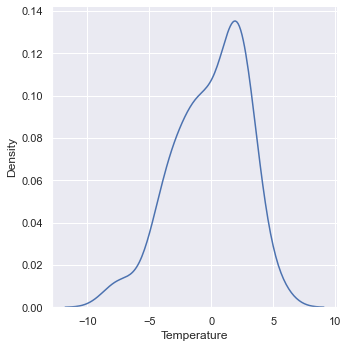

In [126]:
# Distribution of residual are approximately Normal Distribution
sns.displot(residuals,kind="kde")

### Observation

- Distribution is left skewed.

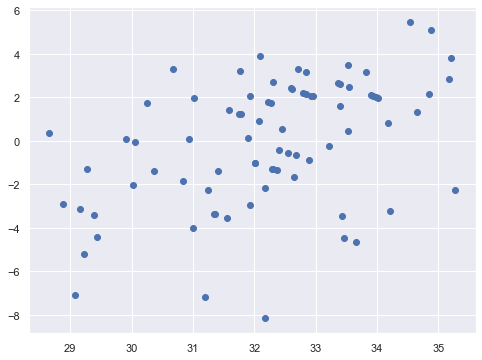

In [127]:
# Scatterplot with prediction and residual
# Uniform Distribution
plt.scatter(elastic_pred,residuals)

In [128]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elastic_pred))
print(mean_absolute_error(y_test,elastic_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_pred)))

8.317775387996829
2.3928315256929684
2.8840553718673343


In [129]:
# R Squared
from sklearn.metrics import r2_score
score=r2_score(y_test,elastic_pred)
print(score)

0.4499695184276321


In [130]:
# Adjusted R Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.38885502047514686

### THE END